In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'


2023-04-10 22:40:34.061567: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-10 22:40:34.824614: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
ROOT_DIR = os.path.dirname(os.path.abspath(os.getcwd()))
DATA_DIR = os.path.join(ROOT_DIR, "data", "DATA_TRAINING.xlsx")
print(DATA_DIR)

df = pd.read_excel(DATA_DIR, index_col=0)

normalizing_factors = df.max()
means = df.mean()

df = df/normalizing_factors

df.head()

/home/franco4w/github/PosterRigLearning/data/DATA_TRAINING.xlsx


,FRONT_LSB,FRONT_LSR,REAR_LSB,REAR_LSR,OUTPUT_PHASE_F,OUTPUT_PHASE_R,OUTPUT_CPL_RMS_F,OUTPUT_CPL_RMS_R
RUN,,,,,,,,
1,0.142857,0.142857,0.142857,0.142857,0.506079,0.652638,0.756346,0.622825
2,0.142857,0.142857,0.142857,0.571429,0.519700,0.725175,0.804872,0.693972
3,0.142857,0.142857,0.142857,1.000000,0.530943,0.781142,0.879404,0.791297
4,0.142857,0.142857,0.571429,1.000000,0.524781,0.862381,0.938740,0.852252
5,0.142857,0.142857,0.571429,0.571429,0.525569,0.814082,0.861299,0.756206


In [3]:
print(normalizing_factors)

FRONT_LSB             7.000000
FRONT_LSR             7.000000
REAR_LSB              7.000000
REAR_LSR              7.000000
OUTPUT_PHASE_F       41.605696
OUTPUT_PHASE_R       59.714122
OUTPUT_CPL_RMS_F     52.503677
OUTPUT_CPL_RMS_R     79.147176
dtype: float64


In [4]:
train_data = df.sample(frac=0.7)
df = df.drop(train_data.index)

val_data = df.sample(frac=0.5)
df = df.drop(val_data.index)

test_data = df

In [5]:
print(len(train_data))
print(len(val_data))
print(len(test_data))

58
12
13


In [6]:
print(test_data.index)

Index([14, 15, 24, 25, 37, 38, 42, 58, 63, 70, 71, 72, 75], dtype='int64', name='RUN')


In [7]:
def get_x_y_array_from_df(df):
    df = df.to_numpy()
    return df[:, :4], df[:, 4:]

In [8]:
x_train, y_train = get_x_y_array_from_df(train_data)
x_val, y_val = get_x_y_array_from_df(val_data)
x_test, y_test = get_x_y_array_from_df(test_data)

In [9]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

2023-04-10 22:40:36.618351: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [10]:
train_dataset = train_dataset.shuffle(100).batch(2)
val_dataset = val_dataset.batch(1)

In [11]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))

model.add(tf.keras.layers.Dense(4))

model.compile(optimizer='adam',
                loss="mse")

In [12]:
for x, y in train_dataset.take(1):
    print(x)
    y_pred = model(x)

print(y_pred)

2023-04-10 22:40:36.807617: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [58,4]
	 [[{{node Placeholder/_0}}]]
2023-04-10 22:40:36.808125: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [58,4]
	 [[{{node Placeholder/_0}}]]


tf.Tensor(
[[1.         0.14285714 0.14285714 0.57142857]
 [0.14285714 0.14285714 0.14285714 0.14285714]], shape=(2, 4), dtype=float64)
tf.Tensor(
[[ 0.04034568 -0.05403385 -0.02334032 -0.05275233]
 [ 0.00097295 -0.01216304 -0.00378134 -0.01882769]], shape=(2, 4), dtype=float32)


In [13]:
history = model.fit(
    train_dataset,
    epochs=50,
    shuffle=True,
    validation_data=val_dataset,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)]
)

Epoch 1/50


2023-04-10 22:40:36.987931: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype double and shape [58,4]
	 [[{{node Placeholder/_1}}]]
2023-04-10 22:40:36.988291: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype double and shape [58,4]
	 [[{{node Placeholder/_1}}]]


29/29 [==============================] - 1s 9ms/step - loss: 0.2536 - val_loss: 0.0315
Epoch 2/50
17/29 [================>.............] - ETA: 0s - loss: 0.0180

2023-04-10 22:40:37.826402: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype double and shape [12,4]
	 [[{{node Placeholder/_1}}]]


29/29 [==============================] - 0s 4ms/step - loss: 0.0154 - val_loss: 0.0194
Epoch 3/50
29/29 [==============================] - 0s 4ms/step - loss: 0.0100 - val_loss: 0.0140
Epoch 4/50
29/29 [==============================] - 0s 4ms/step - loss: 0.0074 - val_loss: 0.0103
Epoch 5/50
29/29 [==============================] - 0s 3ms/step - loss: 0.0062 - val_loss: 0.0086
Epoch 6/50
29/29 [==============================] - 0s 4ms/step - loss: 0.0047 - val_loss: 0.0057
Epoch 7/50
29/29 [==============================] - 0s 3ms/step - loss: 0.0039 - val_loss: 0.0045
Epoch 8/50
29/29 [==============================] - 0s 3ms/step - loss: 0.0030 - val_loss: 0.0034
Epoch 9/50
29/29 [==============================] - 0s 3ms/step - loss: 0.0042 - val_loss: 0.0029
Epoch 10/50
29/29 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.0022
Epoch 11/50
29/29 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0029


In [14]:
eval = model.evaluate(x=x_test, y=y_test)

1/1 [==============================] - 0s 98ms/step - loss: 0.0027


In [15]:
np.sqrt(eval*means*normalizing_factors)

FRONT_LSB            0.270243
FRONT_LSR            0.270243
REAR_LSB             0.276446
REAR_LSR             0.271495
OUTPUT_PHASE_F       1.827563
OUTPUT_PHASE_R       2.792987
OUTPUT_CPL_RMS_F     2.558701
OUTPUT_CPL_RMS_R     3.649194
dtype: float64

In [16]:
y_pred = model(x_test)

In [17]:
test_data

,FRONT_LSB,FRONT_LSR,REAR_LSB,REAR_LSR,OUTPUT_PHASE_F,OUTPUT_PHASE_R,OUTPUT_CPL_RMS_F,OUTPUT_CPL_RMS_R
RUN,,,,,,,,
14,0.142857,0.571429,0.142857,1.000000,0.613652,0.789738,0.870029,0.807722
15,0.142857,0.571429,0.571429,1.000000,0.609915,0.873777,0.926759,0.873103
24,0.142857,1.000000,0.571429,1.000000,0.774589,0.888863,0.930533,0.897261
25,0.142857,1.000000,0.571429,0.571429,0.759646,0.829744,0.875563,0.801886
37,0.571429,0.142857,1.000000,0.571429,0.590557,0.876823,0.909275,0.813725
38,0.571429,0.142857,1.000000,1.000000,0.583380,0.927462,0.978095,0.903913
42,0.571429,0.571429,0.142857,0.142857,0.633229,0.652749,0.777531,0.635522
58,1.000000,0.142857,0.142857,1.000000,0.713034,0.817637,0.881136,0.815830
63,1.000000,0.142857,0.571429,1.000000,0.718983,0.895348,0.924601,0.874958


In [18]:
y_pred*normalizing_factors[4:].to_numpy()

<tf.Tensor: shape=(13, 4), dtype=float32, numpy=
array([[26.55643 , 48.327675, 47.31083 , 66.0963  ],
       [27.713757, 52.379265, 49.422253, 69.631355],
       [32.023808, 53.522964, 50.625046, 71.61979 ],
       [29.73032 , 47.431297, 45.808907, 63.308365],
       [25.774246, 52.175026, 49.509964, 67.24751 ],
       [29.026524, 59.345795, 55.508633, 76.61268 ],
       [27.587317, 38.598988, 41.67685 , 50.31199 ],
       [31.43497 , 54.366573, 52.98273 , 73.07632 ],
       [31.232388, 57.628258, 54.774033, 75.50799 ],
       [33.625523, 55.778553, 52.78787 , 73.33562 ],
       [33.068268, 50.31172 , 49.625824, 64.749054],
       [32.969265, 45.240482, 46.878117, 58.098003],
       [34.151585, 60.6926  , 56.65543 , 79.03006 ]], dtype=float32)>

In [19]:
test_data*normalizing_factors

,FRONT_LSB,FRONT_LSR,REAR_LSB,REAR_LSR,OUTPUT_PHASE_F,OUTPUT_PHASE_R,OUTPUT_CPL_RMS_F,OUTPUT_CPL_RMS_R
RUN,,,,,,,,
14,1.0,4.0,1.0,7.0,25.531435,47.158541,45.679741,63.928897
15,1.0,4.0,4.0,7.0,25.375918,52.176830,48.658272,69.103655
24,1.0,7.0,4.0,7.0,32.227300,53.077649,48.856385,71.015635
25,1.0,7.0,4.0,4.0,31.605586,49.547458,45.970256,63.467041
37,4.0,1.0,7.0,4.0,24.570518,52.358735,47.740276,64.404038
38,4.0,1.0,7.0,7.0,24.271914,55.382553,51.353582,71.542197
42,4.0,4.0,1.0,1.0,26.345921,38.978315,40.823241,50.299798
58,7.0,1.0,1.0,7.0,29.666257,48.824450,46.262858,64.570629
63,7.0,1.0,4.0,7.0,29.913772,53.464911,48.544931,69.250458


In [20]:
def eval_and_renorm(x):
    x /= normalizing_factors[:4].to_numpy()
    x = tf.convert_to_tensor([x])
    return model(x).numpy()*normalizing_factors[4:].to_numpy()
    

In [21]:
x = range(1,8)
y = []

for i in x:
    y.append(eval_and_renorm([1,i,2.1,4]))

In [27]:
y[0][0]

array([19.50633159, 42.35869235, 41.18487843, 56.24794742])

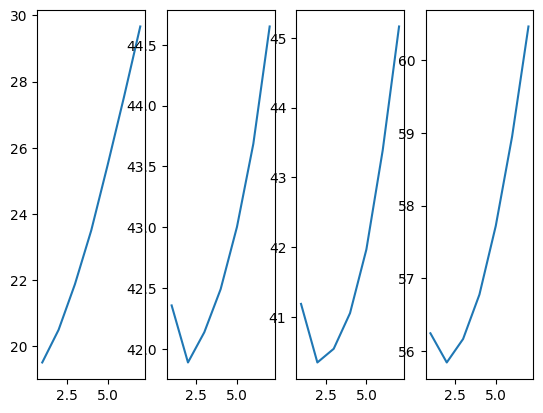

In [28]:
plt.subplot(141)
plt.plot(x, [sample[0][0] for sample in y])

plt.subplot(142)
plt.plot(x, [sample[0][1] for sample in y])
plt.subplot(143)
plt.plot(x, [sample[0][2] for sample in y])
plt.subplot(144)
plt.plot(x, [sample[0][3] for sample in y])
